In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
# Importer les données
data = np.genfromtxt('Mall_Customers.csv', delimiter=',', skip_header=1, usecols=(2, 3)) #utilisation juste de la colonne age et revenu annuel

In [14]:
# Standardiser les données
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
#data_std

[250.5881157075468, 110.25935857407526, 68.80965424440392, 49.93003145405627, 38.13786249165048]


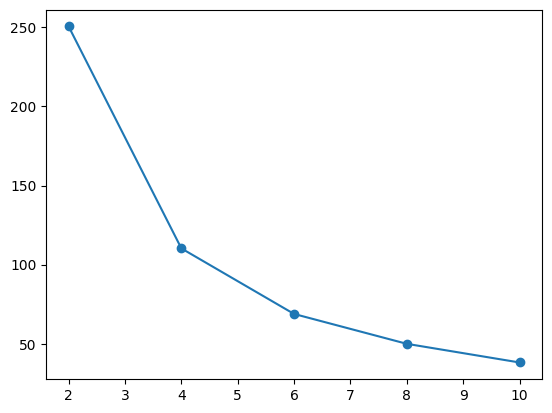

In [15]:
cluster_range=[2,4,6,8,10]
inertie=[]

for c in cluster_range:
    kmeans=KMeans(init='k-means++',n_clusters=c).fit(data_std)
    inertie.append(kmeans.inertia_)
    
print(inertie)

#dessiner les inerties calculé
plt.Figure()
plt.plot(cluster_range,inertie,marker='o')
plt.show()

In [16]:
# Appliquer k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_std)
labels = kmeans.labels_

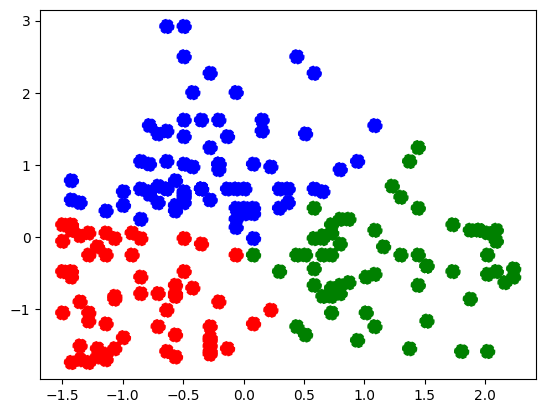

In [17]:
plt.scatter(data_std[labels == 0, 0], data_std[labels == 0, 1], color='blue', s=100, linestyle='--')
plt.scatter(data_std[labels == 1, 0], data_std[labels == 1, 1], color='red', s=100, linestyle='--')
plt.scatter(data_std[labels == 2, 0], data_std[labels == 2, 1], color='green', s=100, linestyle='--')
plt.show()